<a href="https://colab.research.google.com/github/EddyGiusepe/Studying_spaCy_NER/blob/main/kaggle_NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h2 align="center">Spacy Custom Named Entity Recognization</h2>


Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro

Link de estudo:

* [spaCy custom Named Entity Recognization (NER)](https://www.kaggle.com/code/navesharma9/spacy-custom-named-entity-recognization/notebook#Add-and-Remove-Pipeline-component)

In [ ]:
# !pip install spacy==3.2

# !python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_md
# !python -m spacy download en_core_web_lg
# !python -m spacy download en_core_web_trf


In [1]:
# Obs: O código roda sem problemas para a spacy==2.3.7

!pip install -U pip setuptools wheel
!pip install -U spacy==3

!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
!python -m spacy download en_core_web_lg
!python -m spacy download en_core_web_trf

     |████████████████████████████████| 2.1 MB 5.4 MB/s 
     |████████████████████████████████| 1.1 MB 76.8 MB/s 
  Attempting uninstall: setuptools
    Found existing installation: setuptools 57.4.0
    Uninstalling setuptools-57.4.0:
      Successfully uninstalled setuptools-57.4.0
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 74.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.1/457.1 kB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 87.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.3/653.3 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
  Attempting uninstall: smart-open
    Found existing installation: smart-open 6.0.0
    Uninstalling smart-open-6.0.0:
      Successfully uninstalled smart-open-6.0.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalo

In [3]:
# Atualizando
!python -m spacy validate

✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.0.0) =================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

NAME              SPACY            VERSION                            
en_core_web_trf   >=3.0.0,<3.1.0   3.0.0   ✔
en_core_web_md    >=3.0.0,<3.1.0   3.0.0   ✔
en_core_web_lg    >=3.0.0,<3.1.0   3.0.0   ✔
en_core_web_sm    >=3.0.0,<3.1.0   3.0.0   ✔



In [4]:

import spacy
import pandas as pd
from spacy import displacy
from spacy.matcher import Matcher
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
import requests
from io import BytesIO

In [14]:
# import spacy

# spacy.prefer_gpu()
# nlp = spacy.load("en_core_web_sm")

import en_core_web_trf

model = spacy.load('en_core_web_trf') #Pre-trained model

In [15]:
doc = model('Hi I am John and I was born on 18th July 1987. \
           I work at Pramati from Hyderabad. I just bought a cricket bat \
           cost $100 from amazon and I will get is knock here for $5. I love Java')

In [16]:
displacy.render(doc, style='ent', jupyter=True)

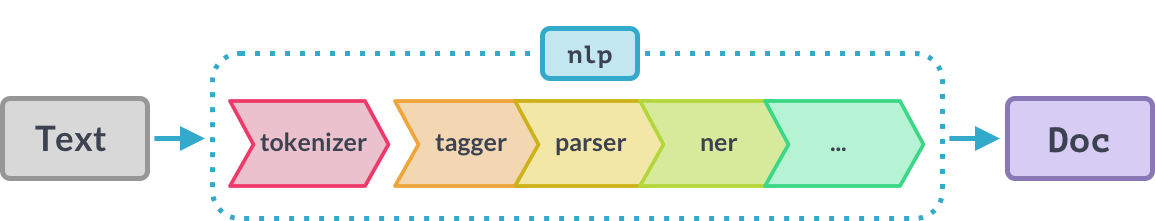

In [17]:
url = 'https://user-images.githubusercontent.com/13643239/55229632-dbff9480-521d-11e9-8499-efb2a9c948db.png'
response = requests.get(url)
Image.open(BytesIO(response.content))

In [18]:
model.pipeline

[('transformer',
  <spacy_transformers.pipeline_component.Transformer at 0x7fbf1e1f5230>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fbf1e1e6a70>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fbf273dede0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fbf1e1238a0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fbf1e16e2d0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fbf1e1fd3c0>)]

In [19]:
doc = model('My name is Jhon and I was born on 23rd June 1987')

In [20]:
doc.ents

(Jhon, 23rd June 1987)

In [24]:
#model.remove_pipe('ner')

('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7f6e22776de0>)

In [ ]:
#model.add_pipe('ner')

In [21]:
model.pipeline

[('transformer',
  <spacy_transformers.pipeline_component.Transformer at 0x7fbf1e1f5230>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7fbf1e1e6a70>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7fbf273dede0>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7fbf1e1238a0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7fbf1e16e2d0>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7fbf1e1fd3c0>)]

In [22]:
doc = model('My name is Jhon and I was born on 23rd June 1987')
doc.ents

(Jhon, 23rd June 1987)

In [23]:
TRAIN_DATA = [
   ("Python is cool", {"entities": [(0, 6, "PROGLANG")]}),
   ("Me like golang", {"entities": [(8, 14, "PROGLANG")]}),
   (("Yu like Java", {"entities": [(8, 14, "PROGLANG")]})),
   ('How to set up unit testing for Visual Studio C++',{'entities': [(45, 48, 'PROGLANG')]}),
   ('How do you pack a visual studio c++ project for release?',{'entities': [(32, 35, 'PROGLANG')]}),
   ('How do you get leading wildcard full-text searches to work in SQL Server?',{'entities': [(62, 65, 'PROGLANG')]}) 
]

In [24]:
TRAIN_DATA

[('Python is cool', {'entities': [(0, 6, 'PROGLANG')]}),
 ('Me like golang', {'entities': [(8, 14, 'PROGLANG')]}),
 ('Yu like Java', {'entities': [(8, 14, 'PROGLANG')]}),
 ('How to set up unit testing for Visual Studio C++',
  {'entities': [(45, 48, 'PROGLANG')]}),
 ('How do you pack a visual studio c++ project for release?',
  {'entities': [(32, 35, 'PROGLANG')]}),
 ('How do you get leading wildcard full-text searches to work in SQL Server?',
  {'entities': [(62, 65, 'PROGLANG')]})]

In [25]:
def create_blank_nlp(train_data):
    nlp = spacy.blank("en")
    ner = nlp.create_pipe("ner")
    nlp.add_pipe(ner, last=True)
    ner = nlp.get_pipe("ner")
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])
    return nlp 

In [ ]:
import random 
import datetime as dt

nlp = create_blank_nlp(TRAIN_DATA)
optimizer = nlp.begin_training()  
for i in range(100):
    random.shuffle(TRAIN_DATA)
    losses = {}
    for text, annotations in TRAIN_DATA:
        nlp.update([text], [annotations], sgd=optimizer, losses=losses)
    print(f"Losses at iteration {i} - {dt.datetime.now()}", losses)

In [33]:
doc = nlp("i write code in datascience") #ignore the sentense if it doen't make sense :)
displacy.render(doc, style="ent", jupyter=True)

In [34]:
doc = nlp("i write code in javascript")
displacy.render(doc, style="ent", jupyter=True)

In [35]:
doc = nlp("Python will be most use language to year 2030 and Eddy will be the better Data Scientist in Python and Java")
displacy.render(doc, style="ent", jupyter=True)